# Looking at fission yield data in an ENDF file
## Overview

Within an ENDF-6 formatted nucelar data library, fission yields all have their own sub-library. There is the sub-library for both neutron and proton induced fission yields, one for photo-induced fission product yields and one for spontaneous fission yields. The data is stored in MF8 (aka 'file 8') as either the independent fission yields in MT454 or the cumulative fission yields in MT459. Independent yields are the fission product yields directly from fission prior to any form of decay on these fission products (i.e. these are the fission fragments created during the fission process). When summing up the independent yields, the sum should be equal to 2.0 for any particular incident particle energy, but only if light charged particles are ignored (some libraries like the European JEFF library do include these light charged particles in the fission yields). Cumulative yields on the other hand are specified for the same set of fission products but the yields now account for decay, including delayed neutrons.

The format of either fission yield section in MF8 is relatively simple: it consists of one or more ENDF records (one for each incident energy value, or a single one for energy independent yields) containing the following information for each fission product:
- the ZAFP fission yield identifier (the ZA value of the fission product)
- FPS: the fission product isomeric state
- Y: the fission yield and its associated uncertainty

The fission yield data also contains a number of flags:
- LE: a flag indicating whether or not the fission yield data is energy independent
- I: the interpolation flag

While the fission yield data does include an interpolation type, interpolating the fission yield data that cna be found in current nuclear data libraries is ill-advised. The current fission yield data sets are not really given for a particular incident energy but are given for a spectral average around that energy.

The following piece of code is an example on how one can loop over the various sets of neutron induced fission yields for Pu239 and print out some of the meta data for these sets:

In [1]:
import ENDFtk

tape = ENDFtk.tree.Tape.from_file( 'resources/nfy-Pu239.endf' )
section = tape.materials.front().section( 8, 454 ).parse()

for index in range( section.number_incident_energies ) :
    
    data = section.yields[index]
    print( 'fission yields for energy =', data.incident_energy )
    print( '  Number fission products:', data.number_fission_products )

fission yields for energy = 0.0253
  Number fission products: 1226
fission yields for energy = 500000.0
  Number fission products: 1244
fission yields for energy = 2000000.0
  Number fission products: 1244
fission yields for energy = 14000000.0
  Number fission products: 1226


## Application 1: plotting fission yields as a function of the mass number
This is a very simple example where we extract the fission yield data for Pu239 and plot the fission yields as a function of mass number. The fission yield data in the ENDF file is given for each fission product so we will need to transform the ENDF data before we can plot it. 

In [2]:
def transformYieldData( data ) :

    results = {}

    for index in range( data.number_fission_products ) :

        a = data.fission_product_identifiers[index]%1000
        if not a in results : results[a] = 0
        results[a] += data.fission_yields[index][0]

    mass = list( set( results.keys() ) )
    mass.sort()
    yields = [ results[value] for value in mass ]
        
    return mass, yields

In [3]:
# use interactive plotting
# ensure that ipympl is installed -> "conda install -c conda-forge ipympl" (for anaconda)
# restart jupyter if required
%matplotlib widget

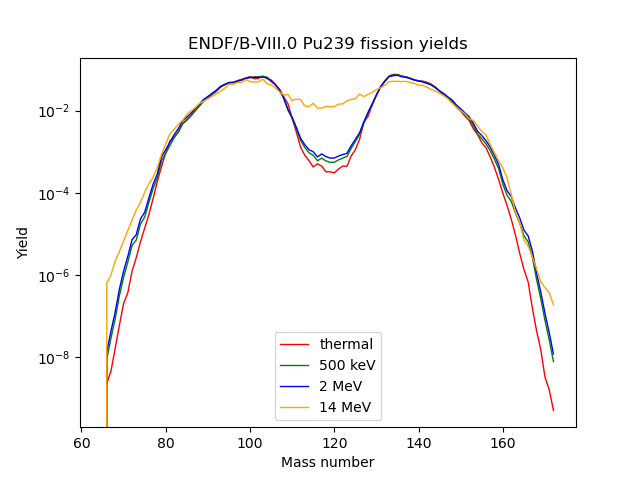

In [4]:
import ENDFtk
import matplotlib.pyplot as plot

tape = ENDFtk.tree.Tape.from_file( 'resources/nfy-Pu239.endf' )
section = tape.materials.front().section( 8, 454 ).parse()

mass1, yields1 = transformYieldData( section.yields[0] )
mass2, yields2 = transformYieldData( section.yields[1] )
mass3, yields3 = transformYieldData( section.yields[2] )
mass4, yields4 = transformYieldData( section.yields[3] )

# plot the data
plot.figure()
plot.plot( mass1, yields1, label = 'thermal', color = 'red', linewidth = 1.0 )
plot.plot( mass2, yields2, label = '500 keV', color = 'green', linewidth = 1.0 )
plot.plot( mass3, yields3, label = '2 MeV', color = 'blue', linewidth = 1.0 )
plot.plot( mass4, yields4, label = '14 MeV', color = 'orange', linewidth = 1.0 )
plot.xlabel( 'Mass number' )
plot.ylabel( 'Yield' )
plot.title( 'ENDF/B-VIII.0 Pu239 fission yields' )
plot.yscale( 'log' )
plot.legend()
plot.show()